# Content and Objective

+ Demonstrate decomposition of system in allpass and minimum-phase system
+ Minimum-phase system reacts quickest among all systems with same magnitude response
+ Different minimum-phase system have different magnitude response
+ Additional allpass components can be added without chaning the magnitude response. However, system has larger group delay.

In [1]:
#importing
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Reminder

We consider time discrete LTI systems with rational transfer functions:
$$G(z)=G_0\cdot \frac{\prod_{\mu=1}^M (z-z_{0,\mu})}{\prod_{\nu=1}^M (z-z_{\infty,\nu})}=\frac{Z(z)}{N(z)}$$

The amplitude response of the system is defined as:
$$A(f)=|G(z=\text{e}^{j2\pi ft_A})|$$

The phase response is:

$$\psi(f)=\text{arg}\{G(z=\text{e}^{j2\pi ft_A})\}$$

### Definition All-pass

A time discrete system with rational transfer function $G(z)$, that has an amplitude response of 1 for all frequencies is called all-pass, i.e.:
$$A(f)=1,\quad \forall f \in \mathbb{R}$$
As can be seen from the notebook that calculates the amplitude response, a system is an all-pass if its zeros are mirrored along the unit circle to the poles!

### Definition Minimum-Phase System

A time discrete stable, **causal** System $\mathcal{S}$ with rational transfer function is of minimum phase, if the zeros $z_{0¸\mu}$ of its transfer function
$$G_{\text{M}}(z)=\frac{Z(z)}{N(z)},$$
all lay within or on the the unit circle, i.e.:
$$|z_{0¸\mu}|\leq 1$$

A minimum-phase system possesses the property that it has the smallest group delay among all systems with the same amplitude response $A(f)$. 

### Theorem

Every causal LTI system $G(z)$ can be factorized as serial concatenation of a minimum-phase system $G_{\text{M}}(z)$ and all pass $G_{\text{A}}(z)$, i.e.: 
$$
G(z)
=
G_{\text{M}}(z) \cdot G_{\text{A}}(z)
$$

# Simulation

### Function to calculate magnitude and phase 
+ These functions are identical to the notebook frequency_response_LTI.ipynb

In [2]:
# function for getting the magnitude
def magnitude( omega, zeros, poles):
    '''
    IN: frequency at which the magnitude is to be determined
        zeros
        poles
    
    OUT: magnitude as numpy array
    '''
    
    # get points on the unit circle where magnitude should be determined
    points_on_circle = np.exp( 1j * omega)
    
    # motivate why you are doing this!
    points_on_circle_matrix_nominator = np.tile(points_on_circle, (len(zeros), 1))
    points_on_circle_matrix_denominator = np.tile( points_on_circle, (len(poles), 1))

    # distances to zeros
    differences_nominator = points_on_circle_matrix_nominator - zeros[:,np.newaxis]
    
    # distances to poles
    differences_denominator = points_on_circle_matrix_denominator - poles[:,np.newaxis]

    # axis=0 to build product along columns! (each column is one frequency)
    nominator = np.prod( differences_nominator, axis=0)
    denominator = np.prod( differences_denominator, axis=0)

    # return result
    return np.abs( nominator / denominator )

# function for getting the phase
def phase(omega, zeros, poles):
    '''
    IN: frequency at which the magnitude is to be determined
        zeros
        poles
    
    OUT: phase as numpy array
    '''
     
    # get points on the unit circle where magnitude should be determined
    points_on_circle = np.exp( 1j * omega )

    # motivate why you are doing this!
    points_on_circle_matrix_nominator = np.tile( points_on_circle, (len(zeros), 1))
    points_on_circle_matrix_denominator = np.tile( points_on_circle, (len(poles), 1))

    # distances to zeros
    differences_nominator = points_on_circle_matrix_nominator - zeros[:, np.newaxis]
    
    # distances to zeros
    differences_denominator = points_on_circle_matrix_denominator - poles[:, np.newaxis]

    # axis=0 to build product along columns! (each column is one frequency)
    nominator = np.prod( differences_nominator, axis=0)
    denominator = np.prod( differences_denominator, axis=0)
    
    # return result
    return np.angle( nominator / denominator )
omega_full = np.arange(-np.pi, np.pi, 0.01)

### Plotting function of the pole zero diagram and frequency response of the original and decomposed signal

In [3]:
def plot_decomposition_amplitudengang_phasengang( zeros, poles):

    ##Calculate frequency responses

    # Decompose zeros and poles to Allpass and minimumphase (function declared below)
    zeros_allpass, poles_allpass, zeros_minimum, poles_minimum = decompose( zeros, poles )
    
     # Used to calculate the full circle
    omega_full = np.arange(-np.pi, np.pi, 0.01)

    # frequency response of full signal
    amplitudengang_full = magnitude( omega_full, zeros = zeros, poles = poles)
    phasengang_full = phase( omega_full, zeros = zeros, poles = poles)

    #normalization constant
    A_0 = np.prod( np.abs( poles_allpass ) )

    # frequency response of allpass part
    amplitudengang_allpass = A_0 * magnitude( omega_full, zeros = zeros_allpass, poles = poles_allpass )
    phasengang_allpass = phase( omega_full, zeros = zeros_allpass, poles = poles_allpass )

    # frequency response of minimum phase part
    amplitudengang_minimum = magnitude( omega_full, zeros = zeros_minimum, poles = poles_minimum)
    phasengang_minimum = phase( omega_full, zeros = zeros_minimum, poles = poles_minimum )

    # Other minimum phase system (it will behave differently!)
    zeros_minimum_different_behaviour = zeros[ np.abs(zeros) <= 1 ]
    amplitudengang_minimum_different_behaviour = magnitude( omega_full, zeros = zeros_minimum_different_behaviour, poles = poles )
    phasengang_minimum_different_behaviour = phase( omega_full, zeros = zeros_minimum_different_behaviour, poles = poles )

    ## Now plotting
    fig, ax = plt.subplots(4, 3, figsize=(20, 30))

    ##Pole Zero diagrams
    ax[0][0].set_title('Poles and Zeros of System')
    ax[0][0].plot(np.exp(1j*omega_full).real, np.exp(1j*omega_full).imag)  # Kreis
    ax[0][0].scatter(zeros.real, zeros.imag, marker='o', c='b', s=180)
    ax[0][0].scatter(poles.real, poles.imag, marker='x', c='y', s=180)
    
    ax[1][0].set_title('Poles and Zeros of Minimum-phase System')
    ax[1][0].plot(np.exp(1j*omega_full).real, np.exp(1j*omega_full).imag)  # Kreis
    ax[1][0].scatter(zeros_minimum.real, zeros_minimum.imag, marker='o', c='b', s=180)
    ax[1][0].scatter(poles_minimum.real, poles_minimum.imag, marker='x', c='y', s=180)

    ax[2][0].set_title('Poles and Zeros of All-pass')
    ax[2][0].plot(np.exp(1j*omega_full).real, np.exp(1j*omega_full).imag)  # Kreis
    ax[2][0].scatter(zeros_allpass.real, zeros_allpass.imag, marker='o', c='b', s=180)
    ax[2][0].scatter(poles_allpass.real, poles_allpass.imag, marker='x', c='y', s=180)

    ax[3][0].set_title('Pole and Zeros of Different Behaviour Minimum-phase System')
    ax[3][0].plot(np.exp(1j*omega_full).real, np.exp(1j*omega_full).imag)  # Kreis
    ax[3][0].scatter(zeros_minimum_different_behaviour.real, zeros_minimum_different_behaviour.imag, marker='o', c='b', s=180)
    ax[3][0].scatter(poles.real, poles.imag, marker='x', c='y', s=180)


    ## Magnitudes
    ax[0][1].set_xlim(-np.pi, np.pi)
    ax[0][1].set_title('Magnitude')
    ax[0][1].plot(omega_full,amplitudengang_full)
    ax[0][1].set_xlabel('$\Omega$')
    ax[0][1].set_ylabel('$|A(\Omega$)')

    ax[1][1].set_xlim(-np.pi, np.pi)
    ax[1][1].set_title('Magnitude')
    ax[1][1].plot(omega_full,amplitudengang_minimum)
    ax[1][1].set_xlabel('$\Omega$')
    ax[1][1].set_ylabel('$|A(\Omega$)')

    ax[2][1].set_xlim(-np.pi, np.pi)
    ax[2][1].set_title('Magnitude')
    ax[2][1].plot(omega_full,amplitudengang_allpass)
    ax[2][1].set_xlabel('$\Omega$')
    ax[2][1].set_ylabel('$|A(\Omega$)')

    ax[3][1].set_xlim(-np.pi, np.pi)
    ax[3][1].set_title('Magnitude')
    ax[3][1].plot(omega_full,amplitudengang_minimum_different_behaviour)
    ax[3][1].set_xlabel('$\Omega$')
    ax[3][1].set_ylabel('$|A(\Omega$)')

    
    ## Phase
    ax[0][2].plot(omega_full,phasengang_full)
    ax[0][2].set_xlim(-np.pi, np.pi)
    ax[0][2].set_ylim(-np.pi, np.pi)
    ax[0][2].set_title('Phase')
    ax[0][2].set_xlabel('$\Omega$')
    ax[0][2].set_ylabel('phase$(A(\Omega$))')

    ax[1][2].plot(omega_full,phasengang_minimum)
    ax[1][2].set_xlim(-np.pi, np.pi)
    ax[1][2].set_ylim(-np.pi, np.pi)
    ax[1][2].set_title('Phase')
    ax[1][2].set_xlabel('$\Omega$')
    ax[1][2].set_ylabel('phase$(A(\Omega$))')

    ax[2][2].plot(omega_full,phasengang_allpass)
    ax[2][2].set_xlim(-np.pi, np.pi)
    ax[2][2].set_ylim(-np.pi, np.pi)
    ax[2][2].set_title('Phase')
    ax[2][2].set_xlabel('$\Omega$')
    ax[2][2].set_ylabel('phase$(A(\Omega$))')

    ax[3][2].plot(omega_full,phasengang_minimum_different_behaviour)
    ax[3][2].set_xlim(-np.pi, np.pi)
    ax[3][2].set_ylim(-np.pi, np.pi)
    ax[3][2].set_title('Phase')
    ax[3][2].set_xlabel('$\Omega$')
    ax[3][2].set_ylabel('phase$(A(\Omega$))')
    # plt.scatter([1], [1]) so kann man einen weiteren Punkt ergänzen!


    plt.show()


### Now we start to decompose a causal LTI system into its minimum-phase system and all-pass

**Reminder**: A causal system is stable iff all poles of its transfer function $G(z)$ are within the unit circle:
$$|z_{\infty¸\mu}|<  1$$

### Here user can define poles and zeros of the system

In [4]:
# Interesting case if some zeros are outside of the unit circle
# poles must be inside (we assume causal --> stable if poles inside unit circle)
poles = np.array( [ 0.25 + 0.8j, 0.25 - 0.8j, 0.5 ] )
zeros = np.array( [ 1 + 1j, 1 - 1j, 0 ] )

### Function to decompose system into all-pass and minimum-phase

In [5]:
def decompose(zeros,poles):
    '''
    IN: zero and poles of system
    
    OUT: Zeros and poles both of Allpass and minimumphase system
    '''
    #find which zeros are inside/outside of unit circle
    indices_of_zeros_outside_unit_circle = np.where( np.abs(zeros) > 1 )[0]
    indices_of_zeros_inside_unit_circle = np.where( np.abs(zeros) <= 1 )[0]

    # minimume phase system will have same poles as original system
    poles_minimum = np.copy( poles )

    # allpass gets the poles from outside of the unit circle
    zeros_allpass = zeros[ indices_of_zeros_outside_unit_circle ] 

    #mirror the zeros from outside of the unit circle
    mirrored_points = 1 / np.conjugate( zeros[ indices_of_zeros_outside_unit_circle ] )
   
    #Mirrored zeros become poles of allpass
    poles_allpass = np.copy( mirrored_points )

    #zeros of minimum system are the mirrored zeros and the zeros from inside
    zeros_minimum = np.hstack( ( mirrored_points,zeros[ indices_of_zeros_inside_unit_circle ] ) )

    return zeros_allpass, poles_allpass, zeros_minimum, poles_minimum

# Now the plotting...
+ Full system
+ Minimum-phase component 
  + Same magnitude as full system
  + Less change of phase required!
+ All-pass component 
  + Constant magnitude response!
+ Different minimum-phase system
  +  Thus, different magnitude response than full system

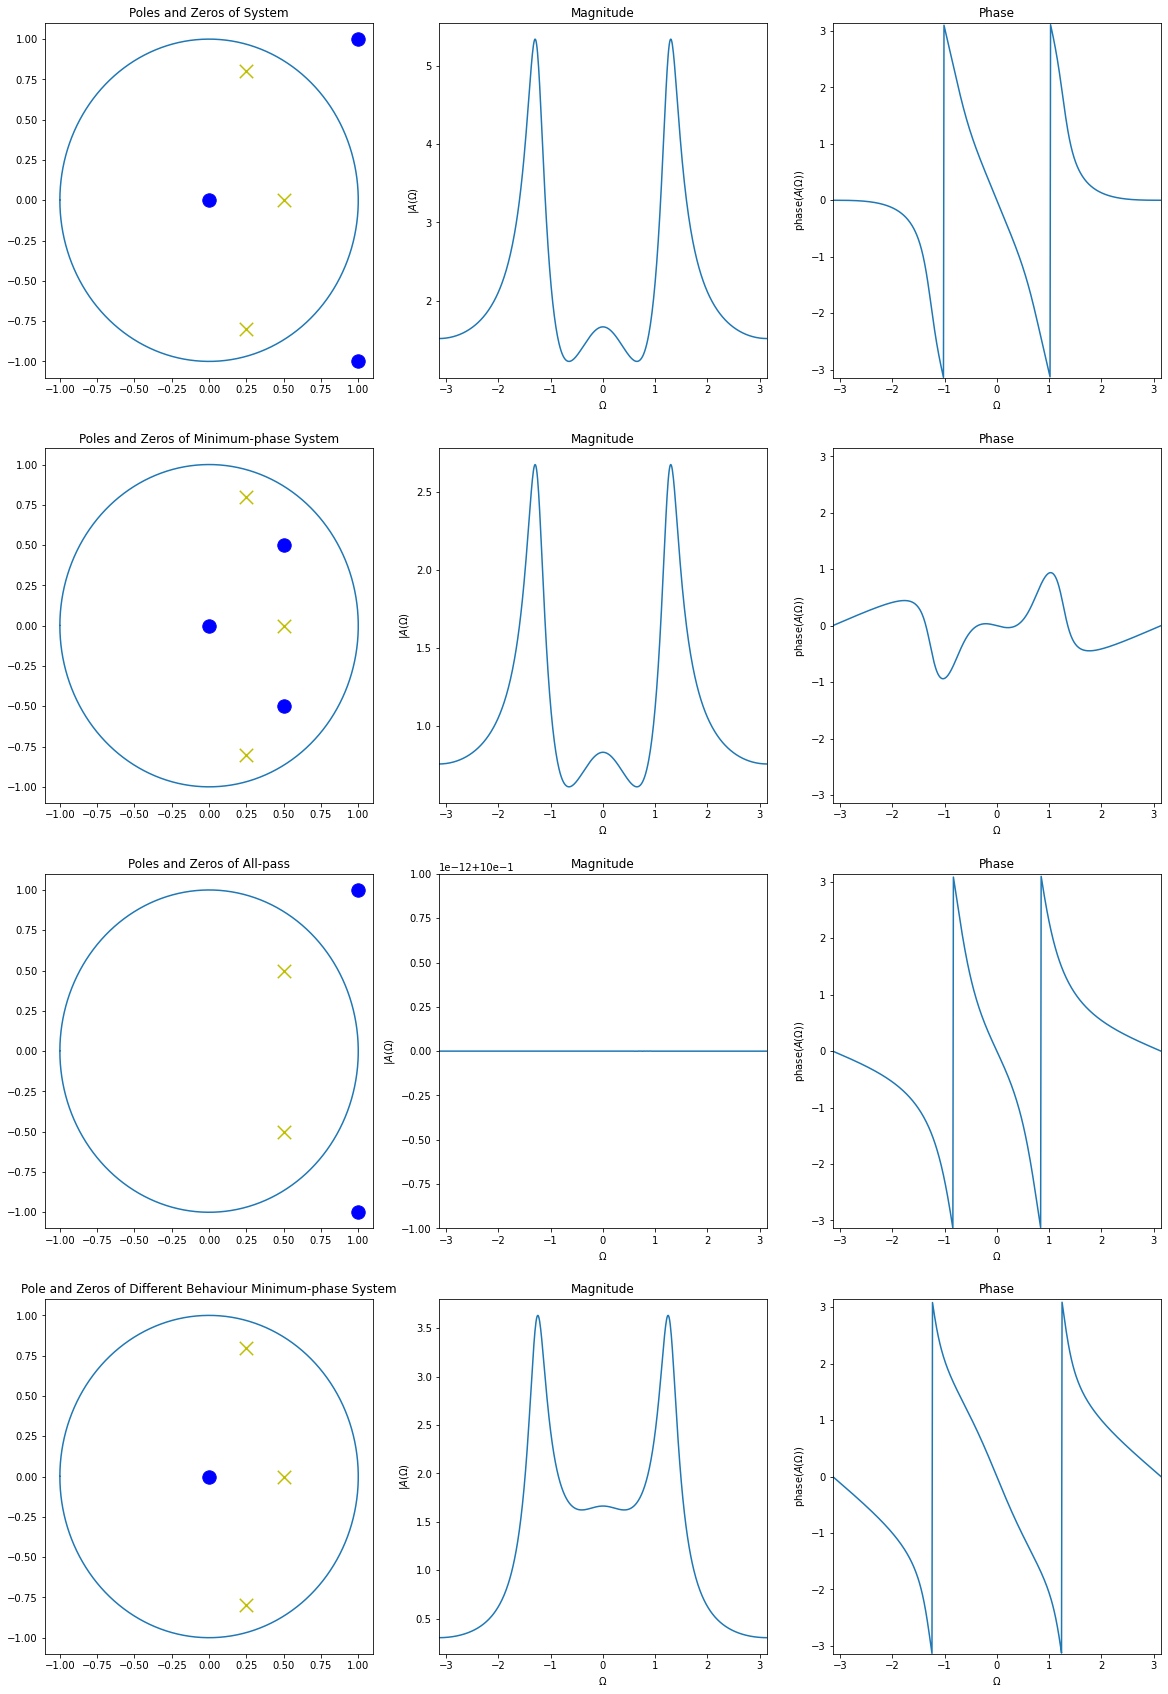

In [6]:

plot_decomposition_amplitudengang_phasengang( zeros = zeros, poles = poles )

# Additional all-pass components can be added without changing magnitude

+ User can select zeros of an all-pass that is concatenated to the previous system
+ Here, methods from scipy are used to determine frequency response

In [7]:
# Here choose zeros of an additional alppas
# We consider a causal system. In this case, the zeros of an additional allpass must all lay outside of the unit circle
# zeros:
zeros_allpass = np.array( [ 1.5, 1 + 1j, 1 - 1j, -1.5 ] )

# assure that zeros can belong to allpass
assert np.all( np.abs( zeros_allpass ) > 1 ), 'invalid zeros'

#poles such that allpas (mirroring)
poles_allpass = 1 / np.conjugate( zeros_allpass )

#Concatenate previous system with new poles and zeros
concatenated_zeros = np.hstack( [ zeros_allpass, zeros ] )
concatenated_poles = np.hstack( [ poles_allpass, poles ] )


#from before
zeros_allpass, poles_allpass, zeros_minimum, poles_minimum = decompose( zeros, poles )

## now generate differnt systems ALL WITH SAME magnitude response

# DLTI--> Discrete linear time invariant (from scipy)

#minimum phase component
Gmin = signal.dlti ( zeros_minimum, poles_minimum, 1, dt = 1 )

# System from the start
G = signal.dlti( zeros, poles, 1, dt = 1 )

# Concatenated system
G_additional = signal.dlti( concatenated_zeros, concatenated_poles, 1, dt = 1 )

#Frequency and Impulse response of minimum phase component
frequency_response_min = Gmin.freqresp( whole=True )
impulse_response_min = Gmin.impulse()

#Frequency and Impulse response of System from the start
frequency_response = G.freqresp( whole=True ) 
impulse_response = G.impulse()

#Frequency and Impulse response of concatenated system
frequency_response_additional = G_additional.freqresp( whole=True )
impulse_response_additional = G_additional.impulse()

# Plotting of different systems with same magnitude response!

+ Minimum phase component of full system
  + Same magnitude
  + Less change of phase required!
  + IA reacts fastest
  
+ Decomposed system
  + Same magnitude  
  
+ Concatenated system
  + Same magnitude
  + Most phase change required
  + Reacts slowest!

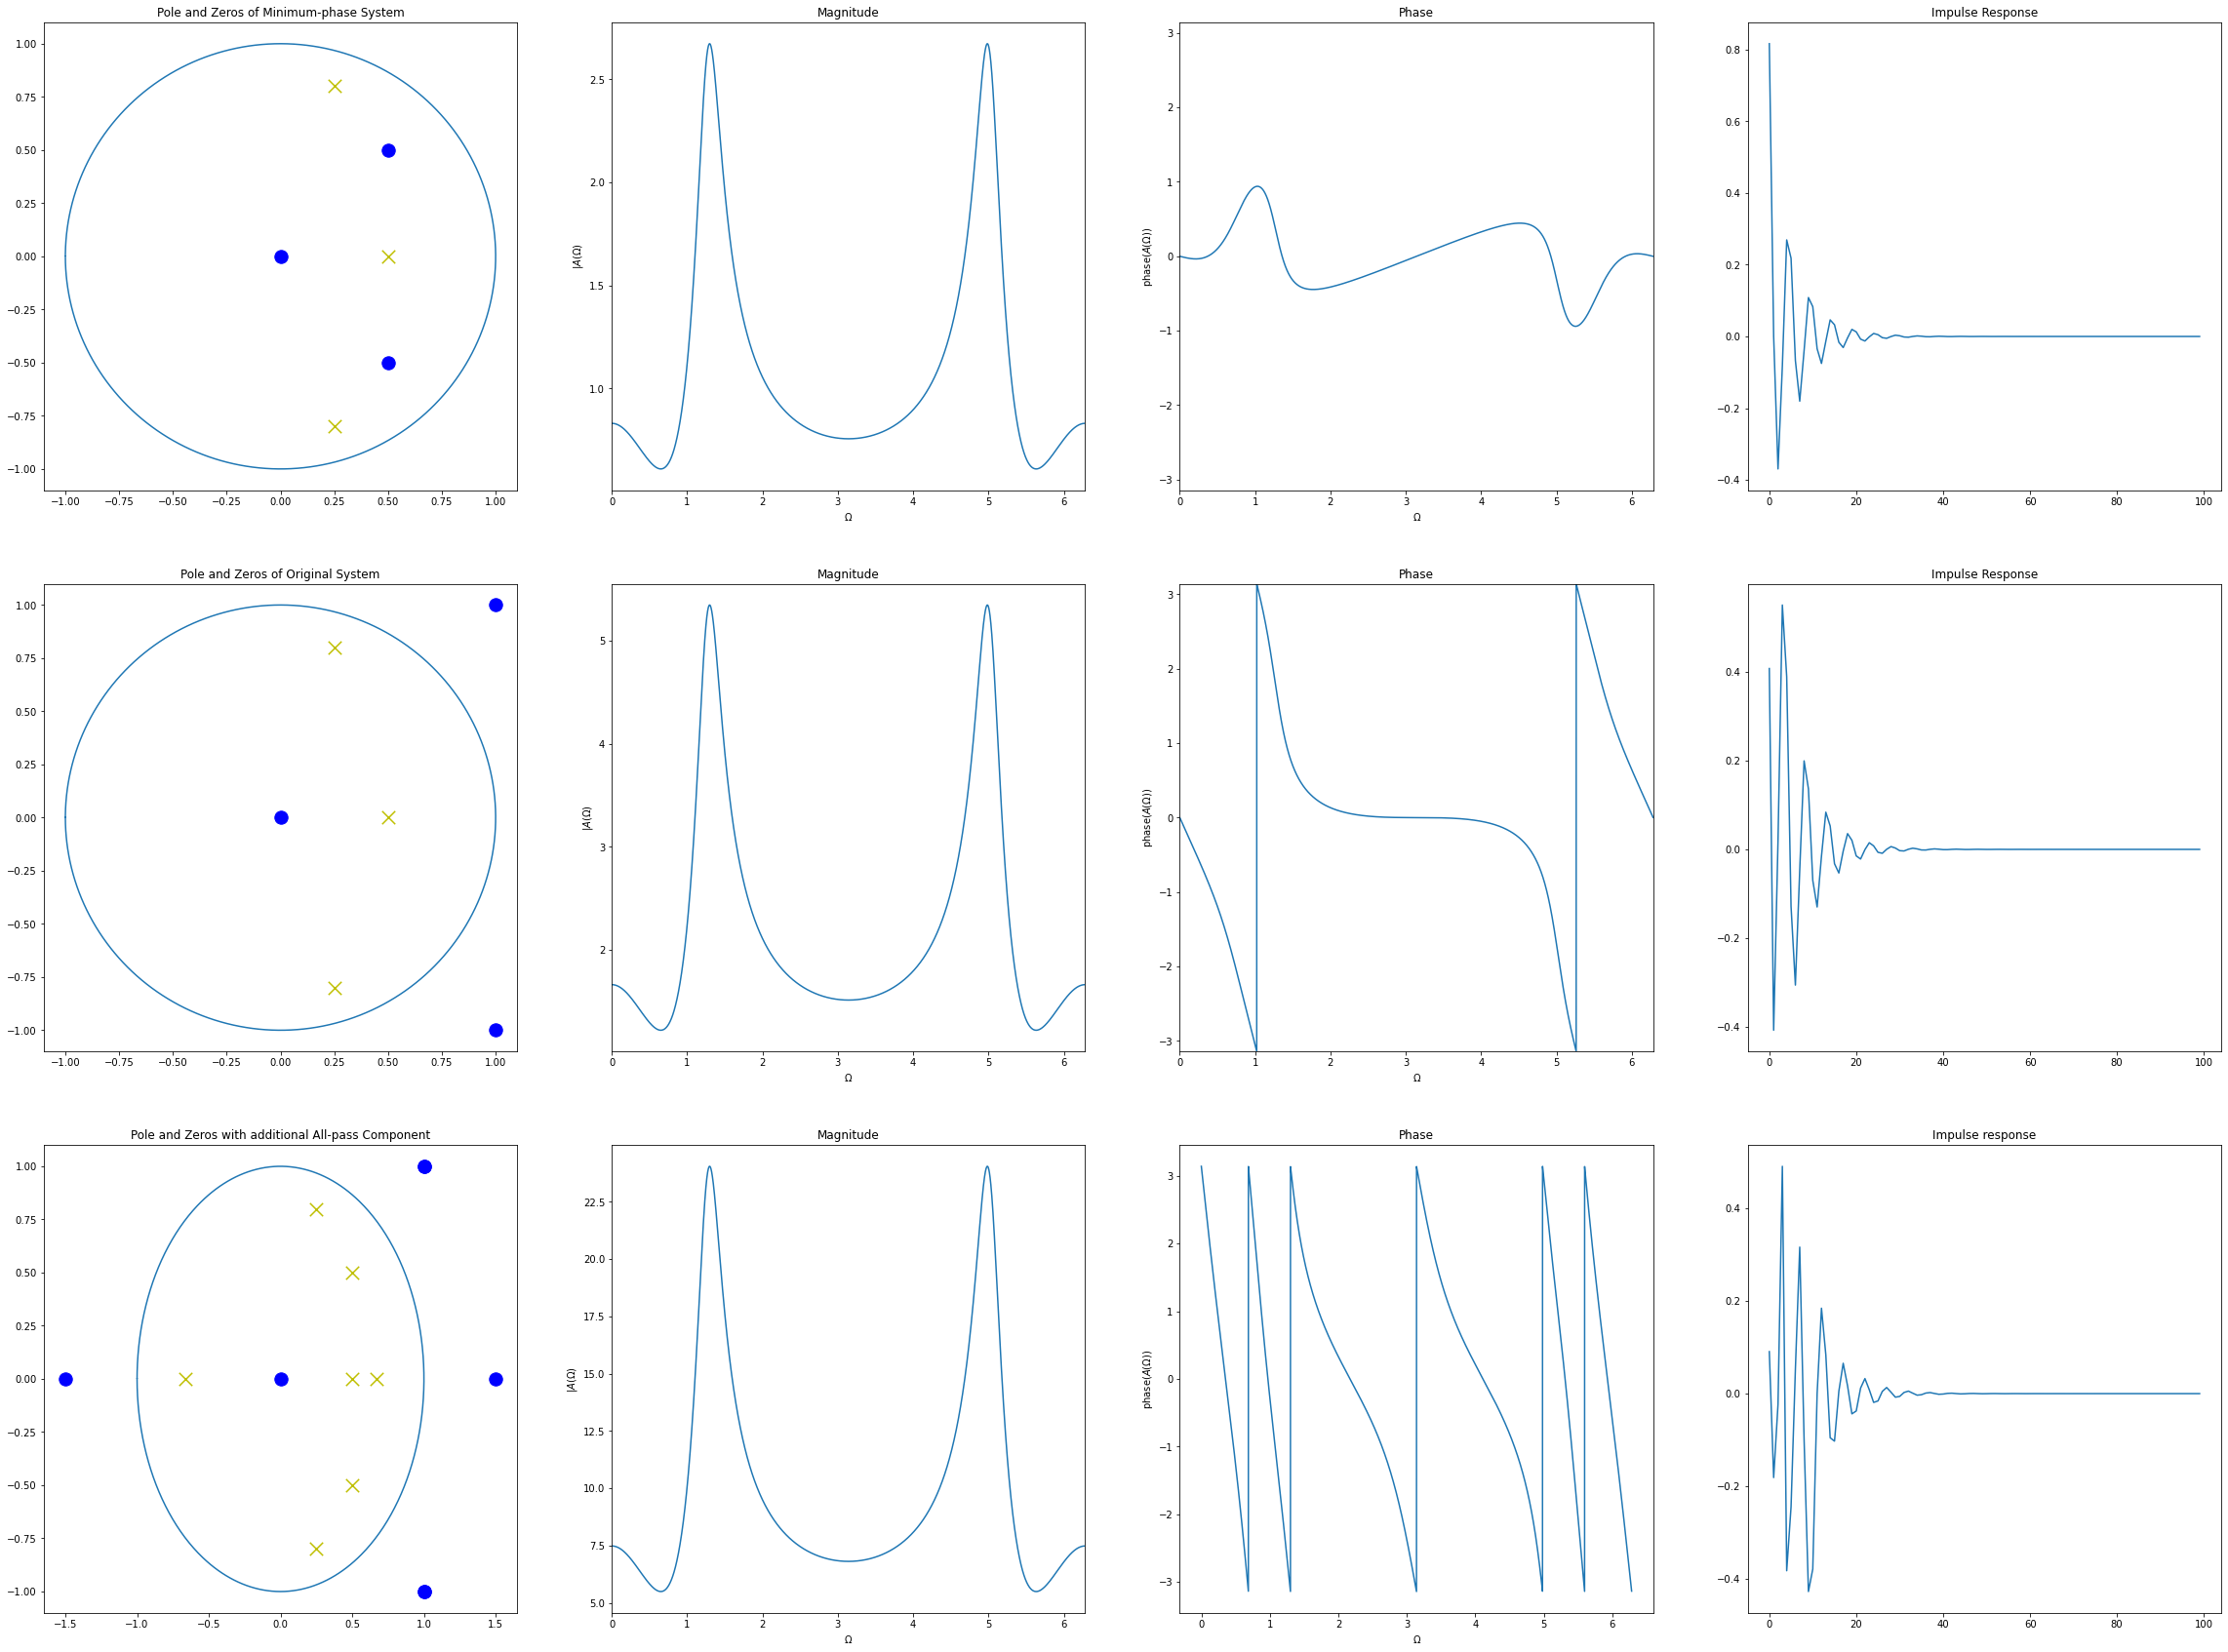

In [8]:
fig, ax = plt.subplots(3, 4, figsize=(40, 30))


#plotting of zeros and poles
ax[0][0].set_title('Pole and Zeros of Minimum-phase System')
ax[0][0].plot(np.exp(1j*omega_full).real, np.exp(1j*omega_full).imag)  # Kreis
ax[0][0].scatter(zeros_minimum.real, zeros_minimum.imag, marker='o', c='b', s=180)
ax[0][0].scatter(poles_minimum.real, poles_minimum.imag, marker='x', c='y', s=180)

ax[1][0].set_title('Pole and Zeros of Original System')
ax[1][0].plot(np.exp(1j*omega_full).real, np.exp(1j*omega_full).imag)  # Kreis
ax[1][0].scatter(zeros.real, zeros.imag, marker='o', c='b', s=180)
ax[1][0].scatter(poles.real, poles.imag, marker='x', c='y', s=180)

ax[2][0].set_title('Pole and Zeros with additional All-pass Component')
ax[2][0].plot(np.exp(1j*omega_full).real, np.exp(1j*omega_full).imag)  # Kreis
ax[2][0].scatter(concatenated_zeros.real, concatenated_zeros.imag, marker='o', c='b', s=180)
ax[2][0].scatter(concatenated_poles.real, concatenated_poles.imag, marker='x', c='y', s=180)


#plotting of magnitude (ALl have the same!)
ax[0][1].set_xlim(0,2*np.pi)
ax[0][1].set_title('Magnitude')
ax[0][1].plot(frequency_response_min[0],np.abs(frequency_response_min[1]))
ax[0][1].set_xlabel('$\Omega$')
ax[0][1].set_ylabel('$|A(\Omega$)')

ax[1][1].set_xlim(0,2*np.pi)
ax[1][1].set_title('Magnitude')
ax[1][1].plot(frequency_response[0],np.abs(frequency_response[1]))
ax[1][1].set_xlabel('$\Omega$')
ax[1][1].set_ylabel('$|A(\Omega$)')

ax[2][1].set_xlim(0,2* np.pi)
ax[2][1].set_title('Magnitude')
ax[2][1].plot(frequency_response_additional[0],np.abs(frequency_response_additional[1]))
ax[2][1].set_xlabel('$\Omega$')
ax[2][1].set_ylabel('$|A(\Omega$)')


# Plotting of phase
ax[0][2].set_title('Phase')
ax[0][2].plot(frequency_response_min[0],np.angle(frequency_response_min[1]))
ax[0][2].set_xlim(0,2*np.pi)
ax[0][2].set_ylim(-np.pi, np.pi)
ax[0][2].set_xlabel('$\Omega$')
ax[0][2].set_ylabel('phase$(A(\Omega$))')

ax[1][2].set_title('Phase')
ax[1][2].plot(frequency_response[0],np.angle(frequency_response[1]))
ax[1][2].set_xlim(0,2*np.pi)
ax[1][2].set_ylim(-np.pi, np.pi)
ax[1][2].set_xlabel('$\Omega$')
ax[1][2].set_ylabel('phase$(A(\Omega$))')

ax[2][2].set_title('Phase')
ax[2][2].plot(frequency_response_additional[0],np.angle(frequency_response_additional[1]))
#ax[2][2].set_xlim(0,2*np.pi)
#ax[2][2].set_ylim(-np.pi, np.pi)
ax[2][2].set_xlabel('$\Omega$')
ax[2][2].set_ylabel('phase$(A(\Omega$))')

#Plotting of the Impulse responses
ax[0][3].set_title('Impulse Response')
ax[0][3].plot(impulse_response_min[0], np.squeeze(impulse_response_min[1])/np.linalg.norm( np.squeeze(impulse_response_min[1])))  

ax[1][3].set_title('Impulse Response')
ax[1][3].plot(impulse_response[0], np.squeeze(impulse_response[1])/np.linalg.norm(np.squeeze(impulse_response[1])))  


ax[2][3].set_title('Impulse response')
ax[2][3].plot(impulse_response_additional[0], np.squeeze(impulse_response_additional[1])/np.linalg.norm(np.squeeze(impulse_response_additional[1])))  



plt.show()


# Direct comparison of minimum phase component with concatenated system
+ minimum phase system reacts faster!

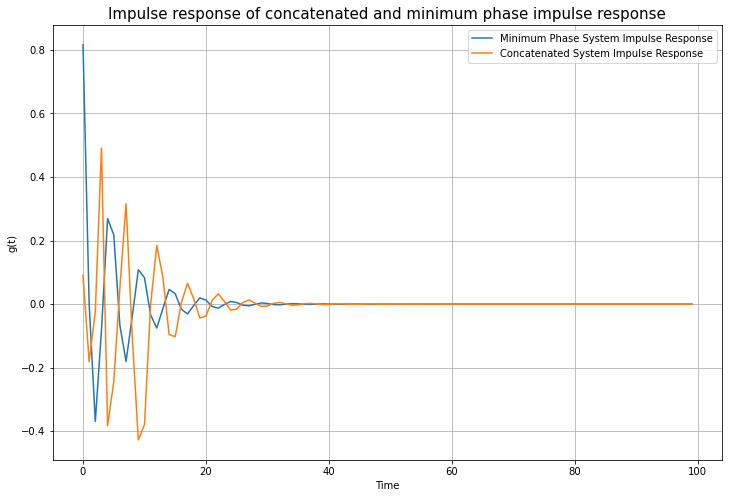

In [9]:
fig = plt.figure(figsize=(12,8))

#plot both impulse responses in one figure
normalized_impulse_response_min = np.squeeze( impulse_response_min[1])/np.linalg.norm( np.squeeze(impulse_response_min[1]))
plt.plot( impulse_response_min[0], normalized_impulse_response_min, label='Minimum Phase System Impulse Response')

normalized_impulse_response_additional = np.squeeze( impulse_response_additional[1])/np.linalg.norm(np.squeeze(impulse_response_additional[1]))
plt.plot( impulse_response_additional[0], normalized_impulse_response_additional,label='Concatenated System Impulse Response')  

#make plot pretty
plt.title('Impulse response of concatenated and minimum phase impulse response',fontsize=15)
plt.grid()
plt.xlabel('Time')
plt.ylabel('g(t)')
plt.legend()